In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
%matplotlib inline

## Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

import warnings 
warnings.simplefilter('ignore')

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

## Random Seed 고정
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
random_state = 42
seed_everything(random_state)

team_name = 'MJ'

In [7]:
train = pd.read_csv('/Users/kimtaehyeong/Downloads/2021-data-creator-camp-1030-1/train.csv')
test = pd.read_csv('/Users/kimtaehyeong/Downloads/2021-data-creator-camp-1030-1/test.csv')
submission = pd.read_csv('/Users/kimtaehyeong/Downloads/2021-data-creator-camp-1030-1/submission.csv')

In [8]:
train.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000,10,1038.333333,0.000000,0.008333,0.000000,0.6,May,2,2,4,1,Returning_Visitor,False,0
1,16,301.136905,4,886.500,78,5097.418330,0.014132,0.030390,7.296889,0.0,Nov,3,2,2,2,Returning_Visitor,True,1
2,7,122.000000,3,40.000,111,3154.970833,0.003448,0.014655,2.613063,0.0,Dec,2,2,1,1,Returning_Visitor,True,1
3,0,0.000000,0,0.000,60,1315.177778,0.009040,0.031794,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,False,1
4,2,48.833333,6,370.875,22,526.028138,0.032143,0.032738,22.935311,0.6,May,1,1,1,2,Returning_Visitor,False,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8626 non-null   int64  
 1   Administrative_Duration  8626 non-null   float64
 2   Informational            8626 non-null   int64  
 3   Informational_Duration   8626 non-null   float64
 4   ProductRelated           8626 non-null   int64  
 5   ProductRelated_Duration  8626 non-null   float64
 6   BounceRates              8626 non-null   float64
 7   ExitRates                8626 non-null   float64
 8   PageValues               8626 non-null   float64
 9   SpecialDay               8626 non-null   float64
 10  Month                    8626 non-null   object 
 11  OperatingSystems         8626 non-null   int64  
 12  Browser                  8626 non-null   int64  
 13  Region                   8626 non-null   int64  
 14  TrafficType             

컬럼 별 설명

1. 해당 내용들은 방문자의 방문 성격과 방문유지시간에 대한 로그 데이터입니다.  
Administrative, Administrative Duration - 홈페이지 권한 접속 횟수, 방문 유지 시간  
Informational, Informational Duration - 홈페이지 정보 관련(광고 등) 접속 횟수, 방문 유지 시간  
Product Related, Product Related Duration - 상품 관련 접속 횟수, 방문 유지 시간  
2. 해당 내용들은 쇼핑몰 홈페이지에서 제공하는 로그 데이터입니다.  
Bounce Rate - 이탈률, 해당 페이지에서 이탈하는 방문자의 비율  
Exit Rate - 종료율, 페이지에 대한 모든 페이지 뷰를 닫는 비율  
Page Value - 페이지 값, 사용자가 전자 상거래를 완료하기 전에 방문한 웹 페이지의 평균 값  
3. 그 외  
SpecialDay - 특별한 날과 얼마나 가까운지(발렌타인, 어버이날 등), 0: 관련없음 ~ 1: 해당일  
Month - 접속한 월  
OperatingSystem - 어떤 운영체제로 접속하였는지(Window, MacOS, Android 등)  
Browser - 어떤 인터넷 브라우저로 접속하였는지(Chrome, Safari 등)  
Region - 어느 지역에서 접속하였는지  
TrafficType - 어떤 경로로 들어오게 되었는지  
VisitorType - 처음 방문인지, 재방문인지, Returning_Visitor/New_Visitor  
Weekend - 주말에 접속했는지, True/False  
4. 목표 데이터  
Revenue - 해당 고객이 사이트에서 상품을 구매했는지, 0: 구매하지 않음 / 1: 구매함  

In [10]:
train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000
mean,2.320195,80.969911,0.506608,34.697895,31.930095,1204.171004,0.022261,0.043159,5.889929,0.062138,2.099351,2.090424,3.148505,4.048806,0.154765
std,3.336850,178.207072,1.257470,141.870808,44.657863,1926.957035,0.048692,0.048877,18.649007,0.199447,0.775558,0.910453,2.391259,3.947282,0.361701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.875000,0.000000,0.014284,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.828571,0.002966,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,92.000000,0.000000,0.000000,38.000000,1477.589698,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,16.000000,2549.375000,686.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,4.000000,5.000000,9.000000,20.000000,1.000000


원핫 인코딩을 돌리기전에 object 변수를 숫자로 바꿔준다.

In [11]:
months = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_num = [2,3,5,6,7,8,9,10,11,12]

for i in range(len(months)):
    train.loc[train['Month']==months[i], 'Month'] = month_num[i]
    test.loc[test['Month']==months[i], 'Month'] = month_num[i]
    

In [12]:
visitor_type = ['New_Visitor', 'Returning_Visitor', 'Other']
visitor_num = [1,2,3]

for i in range(len(visitor_type)):
    train.loc[train['VisitorType']==visitor_type[i], 'VisitorType'] = visitor_num[i]
    test.loc[train['VisitorType']==visitor_type[i], 'VisitorType'] = visitor_num[i]

In [13]:
weekends = [True, False]
weekends_num = [1,2]

for i in range(len(weekends)) :
    train.loc[train['Weekend'] == weekends[i], 'Weekend'] = weekends_num[i]
    test.loc[train['Weekend'] == weekends[i], 'Weekend'] = weekends_num[i]

In [14]:
# 원 핫 인코딩 
# 변환 시킬 컬럼 : Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend
cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
for col in cols:
    train[col] = one_hot_encoder.fit_transform(train[[col]])
    test[col] = one_hot_encoder.fit_transform(test[[col]])

In [ ]:
## 일원 분석
for col in train.columns:
    plt.figure(figsize=(10,5))
    if col in ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']:
        mes = train[col].value_counts()
        plt.figure(figsize=(10,5))
        sns.countplot(train[col], order = mes.index)        
        xval = -.41
        for index, value in mes.items():
            plt.text(x = xval, y = value + 50, s = str(value))
            xval += 1.03
    else:
        sns.distplot(x = train[col])
    plt.title(col)
    plt.show()

In [ ]:
## 이원 분석
for col in train.columns.drop('Revenue'):
    plt.figure(figsize=(10,5))
    if train[col].dtype in ['object', 'bool']:
        sns.countplot(x = col, data = train, hue = 'Revenue')
    else:
        sns.boxplot(x = 'Revenue',y = col, data = train)
    plt.title(col)
    plt.show()

분석을 했을때 이상치가 비정상적으로 너무 많았다.

In [16]:
## ex1) 이상치 제거 함수
def get_outlier(df=None, column=None, alpha = 25, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_lo = np.percentile(df[column].values, alpha)
    quantile_up = np.percentile(df[column].values, 100-alpha)

    IQR = quantile_up - quantile_lo
    IQR_weight = IQR*weight
        
    lowest = quantile_lo - IQR_weight
    highest = quantile_up + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [14]:
train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [15]:
## 이상치 제거, 훈련 데이터만 적용한다.
outlier_col = ['Administrative_Duration', 'Informational']
for col in outlier_col:
    remove_idx = get_outlier(train, col)
    if len(remove_idx) > 0:
        train.drop(remove_idx, axis=0, inplace=True)
train.index = range(len(train))

중요하다 생각한 이상치들을 다 지워보니 3000개가 넘는 데이터가 사라져버렸다.  
그래서 우리는 모두 다 지우기보다는 상관관계표를 보고 admin과 productrelated가 연관성이 없지 않다 판단하고 admin의 이상치는 productrelated의 이상치도 대표하지 않을까 해서 admin의 이상치를 다 지워버렸다. 또한 admin과 admin_duration 둘 중 클릭횟수의 이상치는 고의가 아니고서는 쉽지가 않고 접속 시간 같은 경우에는 홈페이지를 켜두고 업무를 본 다던지 까먹고 그대로 두는 경우가 있어서 이상치의 영향력이 클거라 생각해서 admin_duration의 이상치는 4분위수에 의해 지워주었다.  
솔직하게 말하면 0~5 cols들이 접속횟수, 접속시간이고 나머지들은 이상치도 이상한 값은 아니였을것이라고 생각하고 해커톤의 특성상 시간이 부족해서 성능을 올리는데 급급해 admin_duration과 informational의 이상치를 지웠을 때 가장 좋은 성능이 나와서 채택했다.  
이는 피드백시간에 상관관계를 보고 이상치를 지우는 것은 우리처럼 주관을 가지고 하는 것이 아니라 target값. 즉 revenue 와 가장 상관관계가 높은 피쳐부터 이상치를 지우는 것이 더 옳다는 평을 받았다. 이는 다음에 코드를 정리 할 때 다시 한 번 해볼 생각이다.  
피드백을 통해 우리는 데이터분석이 우리의 주관을 넣는 것보다는 데이터 자체를 보고 데이터안에서 움직이는 것이 더 중요하다는 생각을 하는 계기가 되었다. 

In [ ]:
## 상관분석
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(train.corr(),
               annot= True,
               annot_kws={"size": 15})

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           6364 non-null   int64  
 1   Administrative_Duration  6364 non-null   float64
 2   Informational            6364 non-null   int64  
 3   Informational_Duration   6364 non-null   float64
 4   ProductRelated           6364 non-null   int64  
 5   ProductRelated_Duration  6364 non-null   float64
 6   BounceRates              6364 non-null   float64
 7   ExitRates                6364 non-null   float64
 8   PageValues               6364 non-null   float64
 9   SpecialDay               6364 non-null   float64
 10  Month                    6364 non-null   float64
 11  OperatingSystems         6364 non-null   float64
 12  Browser                  6364 non-null   float64
 13  Region                   6364 non-null   float64
 14  TrafficType             

우리가 진행한 방식대로 이상치를 제거해 6364개의 데이터가 남았다. 

In [17]:
train.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,10,1038.333333,0.000000,0.008333,0.00000,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0,0.0,0,0.0,60,1315.177778,0.009040,0.031794,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,0.0,0,0.0,40,3998.333333,0.002439,0.041870,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,3,63.0,0,0.0,31,770.583333,0.005714,0.023810,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0,0.0,0,0.0,8,332.000000,0.000000,0.028571,14.12737,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1


# 모델링

In [18]:
X = train.drop(['Revenue'], axis = 1)
y = train['Revenue']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify= y)

In [19]:
from lightgbm import LGBMClassifier

threshold = 0.05
model = LGBMClassifier(max_depth=20,
                       n_estimators=2000,
                       learning_rate=0.01,
                       num_leaves=2000)
model.fit(X_train, y_train)
print(model.get_params())
y_prob = model.predict_proba(X_valid)
y_pred = [0 if p > threshold else 1 for p in y_prob[:,0]]

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 2000, 'n_jobs': -1, 'num_leaves': 2000, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


모델링에 대해서도 이것저것 여러가지 모델을 사용해보고 성능을 올리는데에만 급급했던 것 같다. 그래서 성능은 좋게 뽑았지만 왜 이 모델을 사용했는지 왜 이렇게 했는지에 대해서는 설명을 하지못해 대회에서 좋은 성적을 거두지 못했다. 앞으로는 전처리를 하면서 그에 맞는 모델을 파악해야하고 모델이 어떤 특징을 갖고 있는지, 또 왜 이 모델을 쓰는게 좋은지에 대해서 설명을 할 수 있어야 하고 공부를 해야 한다고 느꼈다.  
일단 lgbm을 사용한 이유는 훈련데이터가 그렇게 많지 않은점과 가볍고 빠르게 돌릴수 있다는점, 또한 의사결정나무가 leaf-wise의 형태로 간다는 점에서 사용했다. 다음에 추가로 정리할 때는 왜 이 데이터에서는 lgbm을 사용했는지도 공부해야 되겠다.

In [20]:
'''from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold


# 모델 학습
models = []

# kfold 교차검증 10번 시행
folds = KFold(n_splits=10, shuffle=True, random_state=42)
# 교차검증 시행할 데이터셋 나누기
for train_idx, val_idx in folds.split(X):
    train_x = X.iloc[train_idx,:]
    train_y = y[train_idx]
    val_x = X.iloc[val_idx,:]
    val_y = y[val_idx]
    
    
    # Light Gradient Boosting Model 사용 (Tree 기반 알고리즘)
    model = LGBMClassifier(max_depth = 20,           # tree의 depth 설정
                           n_estimators = 2000,      # Tree 갯수
                           learning_rate = 0.01,     # 학습률
                           num_leaves = 2000)        # Tree 모델의 복잡성을 컨트롤하는 파라미터 
                                                     # 보통 num_leaves는 2^(max_depth)보다 작게 설정해야 오버피팅을 줄일 수 있다
    
    model.fit(train_x, train_y,
              eval_set = [(val_x, val_y)],
              eval_metric = ['rmse'],
              early_stopping_rounds = 300,
              verbose = 500)
    
    models.append(model)'''

"from sklearn.metrics import mean_squared_error as mse\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, KFold\n\n\n# 모델 학습\nmodels = []\n\n# kfold 교차검증 10번 시행\nfolds = KFold(n_splits=10, shuffle=True, random_state=42)\n# 교차검증 시행할 데이터셋 나누기\nfor train_idx, val_idx in folds.split(X):\n    train_x = X.iloc[train_idx,:]\n    train_y = y[train_idx]\n    val_x = X.iloc[val_idx,:]\n    val_y = y[val_idx]\n    \n    \n    # Light Gradient Boosting Model 사용 (Tree 기반 알고리즘)\n    model = LGBMClassifier(max_depth = 20,           # tree의 depth 설정\n                           n_estimators = 2000,      # Tree 갯수\n                           learning_rate = 0.01,     # 학습률\n                           num_leaves = 2000)        # Tree 모델의 복잡성을 컨트롤하는 파라미터 \n                                                     # 보통 num_leaves는 2^(max_depth)보다 작게 설정해야 오버피팅을 줄일 수 있다\n    \n    model.fit(train_x, train_y,\n              eval_set = [(val_x, val_y)],\n              eval_metric = ['rmse'],\n 

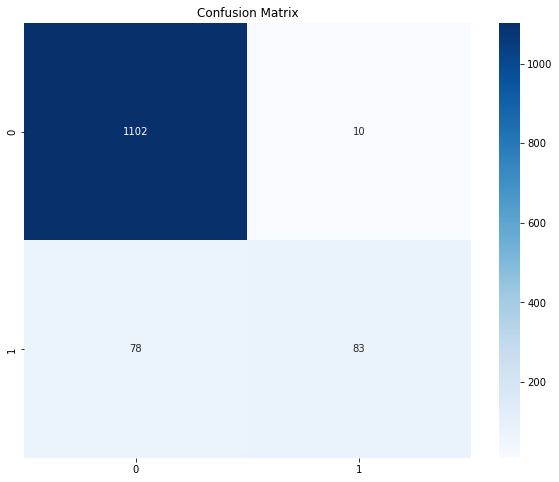

검증 데이터 정확도: 93.087%
검증 데이터 AUC: 0.753
검증 데이터 F1값: 0.654


In [21]:
## 검증 데이터 정답 확인
cmat = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix")
sns.heatmap(cmat, annot = True, fmt='',cmap='Blues')
plt.show()

## 검증 데이터 스코어 확인
acc = accuracy_score(y_valid, y_pred)
auc = roc_auc_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print(f"검증 데이터 정확도: {acc*100:.3f}%")
print(f"검증 데이터 AUC: {auc:.3f}")
print(f"검증 데이터 F1값: {f1:.3f}")

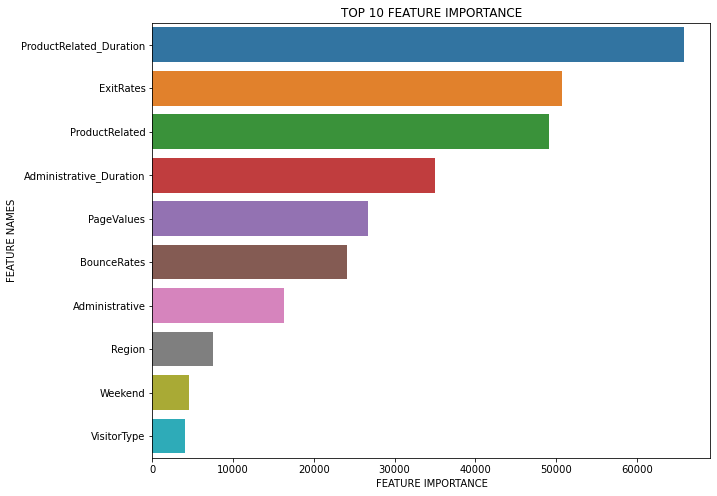

In [22]:
## 피쳐 중요도 확인
try:
    feature_importance = np.abs(model.coef_[0])
except:
    feature_importance = model.feature_importances_

data={'feature_names':X_train.columns,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
plt.title('TOP 10 FEATURE IMPORTANCE')

plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')    
plt.show()


In [ ]:
## 확률로 제출하기
ans = model.predict_proba(test)[:,1]
## Boolean으로 제출하기
ans = [1 if p > threshold else 0 for p in ans]

In [ ]:
submission['Revenue'] = ans
submission.index = submission['index']
submission = submission.drop(['index'], axis = 1)
submission.to_csv(f'team_{team_name}_submission.csv', encoding='utf8')

In [ ]:
submission

# 소감

위에서 언급했듯이 평소 여유롭게 준비하는 것과 달리 주어진 시간내에 문제를 해결하니 평소 어떤 문제가 있었는지 깨달을 수 있었다. 또 멘토들의 피드백을 통해 성능을 올리는데에만 집중하는 것이 아닌 전처리, 모델링, eda 과정 모두에 우리의 논리가 있어야했고 다른 사람을 설득시킬 수 없다면 아무리 성능이 좋은들 그 누구도 설득을 시킬 수 없는 의미없는 모델이 된다는 점을 깨달았다. 그래서 앞으로는 모든 과정에 왜? 를 생각해서 프로젝트를 진행시켜야겠다.  
너무 아쉬움이 크고 얻은 것이 많은 의미있는 대회였다. 


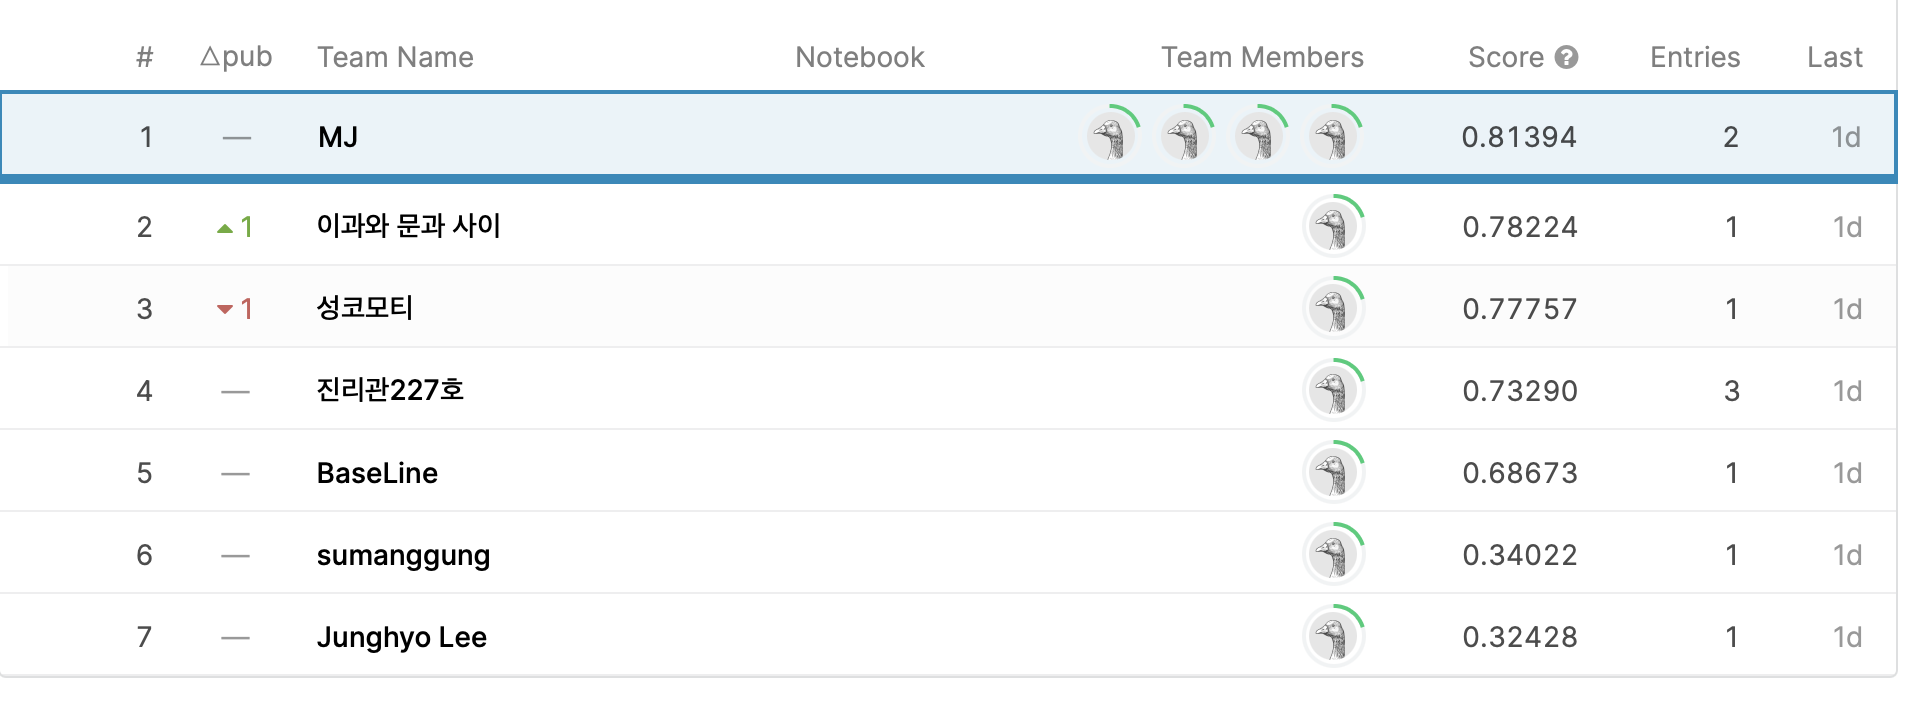